<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/11_Regularized_Regression_Ridge_on_Gapminder_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regularized Regression - Ridge: Gapminder Data**

Lasso is great for feature selection, but when building regression models, Ridge regression is a preferred first choice.

Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients.



![alt text](https://raw.githubusercontent.com/raj-vijay/ml/master/images/Lasso.jpg)


However, lasso is not the only way to perform regularization.

The sum of the squared values of the coefficients when multiplied by some alpha - like in Ridge regression - results in the computation of the L2 norm. 


![alt text](https://raw.githubusercontent.com/raj-vijay/ml/master/images/Ridge.jpg)

Here, we fit ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each. The R2 scores along with the standard error for each alpha is plotted.

The Gapminder Dataset describes life expentency depending on factors like fertility, GDP, Region, population etc.

The dataset is imported from Kaggle.

https://www.kaggle.com/

Installing Kaggle Package to access the Gapminder dataset from Kaggle.

In [14]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [15]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Protect Kaggle JSON file for security reasons

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Import the Gapminder dataset

In [18]:
!kaggle datasets download -d deepakdodi/gapminder

  0% 0.00/5.43k [00:00<?, ?B/s]
100% 5.43k/5.43k [00:00<00:00, 9.12MB/s]


In [19]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the Gapminder file into a DataFrame: df
df = pd.read_csv('gapminder.zip', compression='zip', header=0, sep=',', quotechar='"')
print(df)

     population  fertility  ...  child_mortality                      Region
0    34811059.0       2.73  ...             29.5  Middle East & North Africa
1    19842251.0       6.43  ...            192.0          Sub-Saharan Africa
2    40381860.0       2.24  ...             15.4                     America
3     2975029.0       1.40  ...             20.0       Europe & Central Asia
4    21370348.0       1.96  ...              5.2         East Asia & Pacific
..          ...        ...  ...              ...                         ...
134   3350832.0       2.11  ...             13.0                     America
135  26952719.0       2.46  ...             49.2       Europe & Central Asia
136  86589342.0       1.86  ...             26.2         East Asia & Pacific
137  13114579.0       5.88  ...             94.9          Sub-Saharan Africa
138  13495462.0       3.85  ...             98.3          Sub-Saharan Africa

[139 rows x 10 columns]


Create array X for the 'fertility' feature and array y for the 'life' target variable.

In [0]:
# Create arrays for features and target variable
y = df['life'].values
X_fertility = df['fertility'].values

In [21]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


**Lasso Regression on Gapminder Dataset**

Lasso regression is able to select features that are the most important for predicting the target values, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way is very useful in situations with data involving thousands of features.

Here, we fit a lasso regression to the Gapminder dataset to plot the coefficients. It can be observed that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

In [0]:
X = df.drop(['life', 'Region'], axis=1)

In [0]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [0]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [0]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [0]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

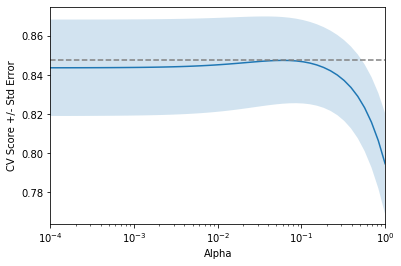

In [30]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)